In [1]:
import os, importlib, sys, time

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
import scipy.linalg as la
import scipy.stats as stats

In [50]:
data = pd.read_csv('EuropeCovid2_data.csv', index_col=0)

In [51]:
region = 'GB'
data_r = data[data.id == region]
Y_raw = data_r.deaths.to_numpy()
POI = np.cumsum(Y_raw) > 0

In [52]:
Y_data = Y_raw[POI]
I_data = data_r.cases[POI].to_numpy()

# 1. parameters

In [53]:
T = Y_data.shape[0]
T0 = 20

In [54]:
GPi = np.load('EuropeCovid2_GPi.npz')

## observation parameters

In [155]:
pi = np.zeros(T+T0)
pi[:GPi['pi'].shape[0]] = GPi['pi']
alpha = 0.2

$$Y_t = \alpha \sum_{s=1}^{t-1} I_s g_{t-s} + \epsilon_t$$

$$\epsilon_t \sim N(0,\sigma_\epsilon^2)$$

## latent parameters

In [156]:
g = np.zeros(T+T0)
g[:GPi['g'].shape[0]] = GPi['g']

In [157]:
d = 2
bmle = [0.207, 1.872]
K = 6.5

$$I_0 = \mu + \eta_0$$

$$I_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1}I_s \pi_{t-s} + \eta_t, ~~ t \geq 1$$

$$\eta_t \sim N(0,\sigma_\eta^2)$$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(\beta \sum_{s=1}^{t-1}A_s h_{t-s})}$$

## seed values

In [174]:
mu_0 = 12 / alpha

# 2. simulation

In [175]:
R = np.zeros(T+T0)
I = np.zeros(T+T0)
A = np.zeros([T+T0, d])
Y = np.zeros(T)

## initialization

In [176]:
A[0] = [1, 0]
R[0] = K / (1 + np.exp(beta @ A[0]))
I[0] = np.random.poisson(mu_0)

## iteration

In [177]:
for t in np.arange(1,T+T0):
    A[t] = [1, 1 * (t > 40)]
    R[t] = K / (1 + np.exp(beta @ A[t]))
    I[t] = np.random.poisson(R[t] * np.sum(np.flip(I[:t])*g[:t]))

In [178]:
for t in np.arange(T):
    Y[t] = np.random.poisson(alpha * np.sum(np.flip(I[:t+T0])*pi[:t+T0]))

## result

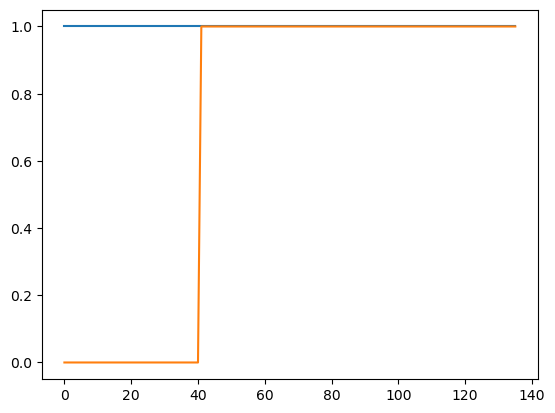

In [179]:
plt.plot(A)

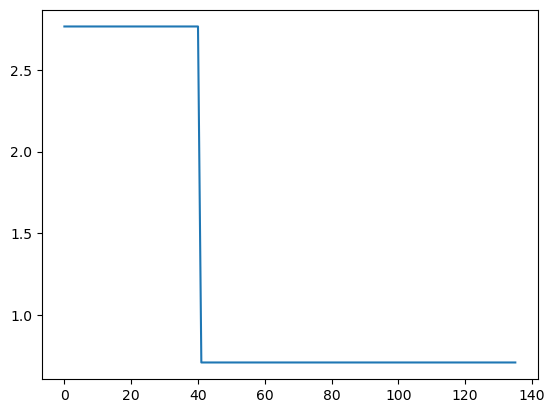

In [180]:
plt.plot(R)

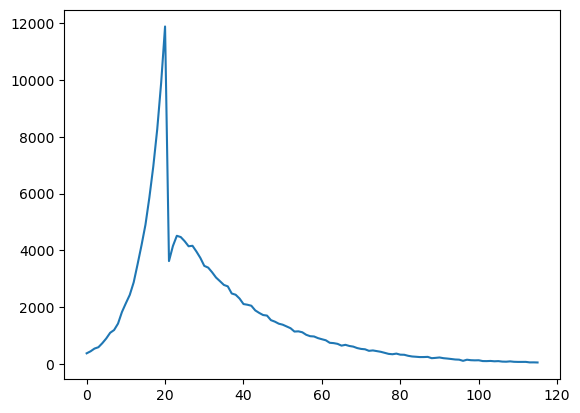

In [181]:
plt.plot(I[T0:])

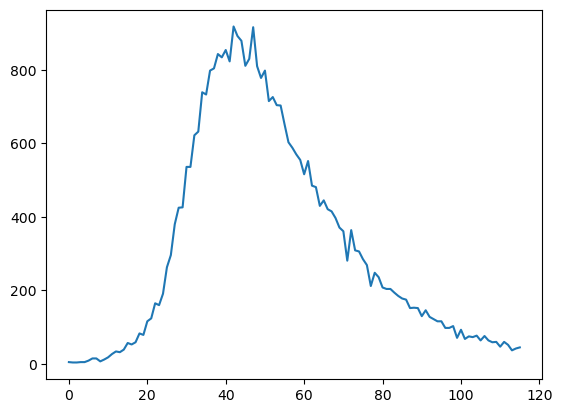

In [182]:
plt.plot(Y)

# 4. Simulation Study

In [183]:
num_sim = 1000

In [184]:
# msim_0 = np.zeros([num_sim])
# ssim_eps = np.zeros([num_sim])
# ssim_eta = np.zeros([num_sim])
# bsim = np.zeros([num_sim, d])

In [185]:
Ys_sim = np.zeros([num_sim, T])
Is_sim = np.zeros([num_sim, T+T0])

## simulation

In [186]:
R = np.zeros(T+T0)
for t in np.arange(T+T0):
    R[t] = K / (1 + np.exp(beta @ A[t]))

In [187]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    I_sim = np.zeros([T+T0])
    Y_sim = np.zeros([T])
    
    I_sim[0] = np.random.poisson(mu_0)
    for t in np.arange(1, T+T0):
        I_sim[t] = np.random.poisson(R[t] * np.sum(np.flip(I_sim[:t])*g[:t]))
    for t in np.arange(T):
        Y_sim[t] = np.random.poisson(alpha * np.sum(np.flip(I_sim[:t+T0])*pi[:t+T0]))
        
#     mhat_0, shat_eps, shat_eta, bhat, ll =\
#         fit(Y_sim, minit_0 = mu_0, sinit_eps = s_eps,
#             sinit_eta = s_eta, binit = beta, 
#             history=True, n_iter=num_iter) 
    
#     msim_0[iter_sim] = mhat_0[-1]
#     ssim_eps[iter_sim] = shat_eps[-1]
#     ssim_eta[iter_sim] = shat_eta[-1]
#     bsim[iter_sim] = bhat[-1]
    
#     lsim[iter_sim] = ll
    Is_sim[iter_sim] = I_sim
    Ys_sim[iter_sim] = Y_sim
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.002556 sec.
2-th simulation finished, 0.002289 sec.
3-th simulation finished, 0.002230 sec.
4-th simulation finished, 0.002233 sec.
5-th simulation finished, 0.002258 sec.
6-th simulation finished, 0.002433 sec.
7-th simulation finished, 0.002289 sec.
8-th simulation finished, 0.002270 sec.
9-th simulation finished, 0.002367 sec.
10-th simulation finished, 0.002250 sec.
11-th simulation finished, 0.002343 sec.
12-th simulation finished, 0.002291 sec.
13-th simulation finished, 0.002323 sec.
14-th simulation finished, 0.003040 sec.
15-th simulation finished, 0.002301 sec.
16-th simulation finished, 0.002282 sec.
17-th simulation finished, 0.002390 sec.
18-th simulation finished, 0.002275 sec.
19-th simulation finished, 0.002732 sec.
20-th simulation finished, 0.002280 sec.
21-th simulation finished, 0.002273 sec.
22-th simulation finished, 0.002466 sec.
23-th simulation finished, 0.002294 sec.
24-th simulation finished, 0.002277 sec.
25-th simulation finished

260-th simulation finished, 0.002267 sec.
261-th simulation finished, 0.002299 sec.
262-th simulation finished, 0.002241 sec.
263-th simulation finished, 0.002524 sec.
264-th simulation finished, 0.002286 sec.
265-th simulation finished, 0.002695 sec.
266-th simulation finished, 0.002271 sec.
267-th simulation finished, 0.002507 sec.
268-th simulation finished, 0.002506 sec.
269-th simulation finished, 0.002677 sec.
270-th simulation finished, 0.002328 sec.
271-th simulation finished, 0.002301 sec.
272-th simulation finished, 0.002279 sec.
273-th simulation finished, 0.002247 sec.
274-th simulation finished, 0.002292 sec.
275-th simulation finished, 0.002254 sec.
276-th simulation finished, 0.006286 sec.
277-th simulation finished, 0.003040 sec.
278-th simulation finished, 0.001103 sec.
279-th simulation finished, 0.000888 sec.
280-th simulation finished, 0.002355 sec.
281-th simulation finished, 0.002863 sec.
282-th simulation finished, 0.002333 sec.
283-th simulation finished, 0.0023

523-th simulation finished, 0.002271 sec.
524-th simulation finished, 0.002320 sec.
525-th simulation finished, 0.002262 sec.
526-th simulation finished, 0.002305 sec.
527-th simulation finished, 0.002264 sec.
528-th simulation finished, 0.002262 sec.
529-th simulation finished, 0.002258 sec.
530-th simulation finished, 0.002292 sec.
531-th simulation finished, 0.003140 sec.
532-th simulation finished, 0.002240 sec.
533-th simulation finished, 0.002225 sec.
534-th simulation finished, 0.002266 sec.
535-th simulation finished, 0.001132 sec.
536-th simulation finished, 0.002283 sec.
537-th simulation finished, 0.002241 sec.
538-th simulation finished, 0.002260 sec.
539-th simulation finished, 0.002247 sec.
540-th simulation finished, 0.002626 sec.
541-th simulation finished, 0.002527 sec.
542-th simulation finished, 0.002670 sec.
543-th simulation finished, 0.002305 sec.
544-th simulation finished, 0.002395 sec.
545-th simulation finished, 0.002302 sec.
546-th simulation finished, 0.0022

793-th simulation finished, 0.002240 sec.
794-th simulation finished, 0.002336 sec.
795-th simulation finished, 0.001180 sec.
796-th simulation finished, 0.007502 sec.
797-th simulation finished, 0.000904 sec.
798-th simulation finished, 0.000887 sec.
799-th simulation finished, 0.003433 sec.
800-th simulation finished, 0.002310 sec.
801-th simulation finished, 0.002344 sec.
802-th simulation finished, 0.002244 sec.
803-th simulation finished, 0.002251 sec.
804-th simulation finished, 0.002281 sec.
805-th simulation finished, 0.002357 sec.
806-th simulation finished, 0.002318 sec.
807-th simulation finished, 0.002292 sec.
808-th simulation finished, 0.002745 sec.
809-th simulation finished, 0.003680 sec.
810-th simulation finished, 0.000862 sec.
811-th simulation finished, 0.005364 sec.
812-th simulation finished, 0.003120 sec.
813-th simulation finished, 0.000908 sec.
814-th simulation finished, 0.000895 sec.
815-th simulation finished, 0.002432 sec.
816-th simulation finished, 0.0023

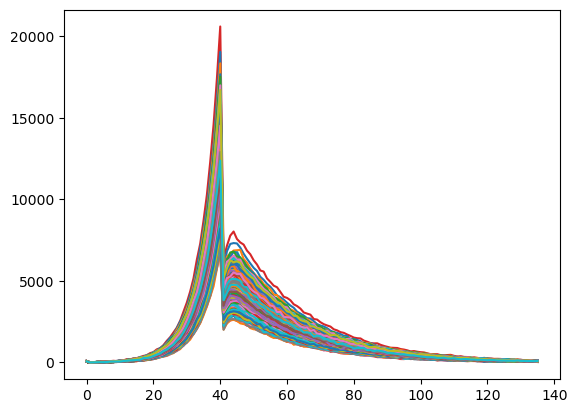

In [188]:
plt.plot(Is_sim.T)
plt.show()

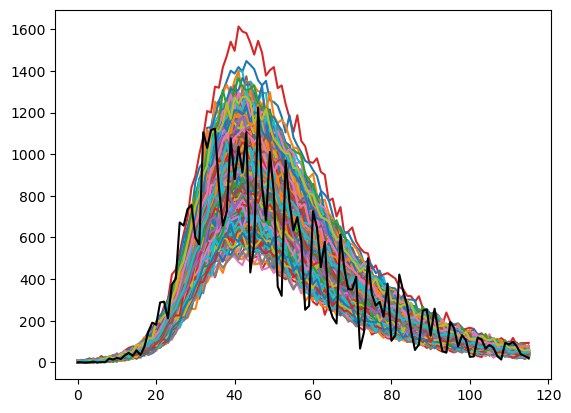

In [189]:
plt.plot(Ys_sim.T)
plt.plot(Y_data, color='black')
plt.show()